<a href="https://colab.research.google.com/github/BiszakAletta/FAKT.ML.kurzus/blob/main/harmadikhazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Adatok beolvasása

In [3]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np



In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Machine learning FAKT/weather_data_24hr.csv')

In [6]:
df.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,sunrise,sunset,moonrise,moonset
0,1,2019-06-01,26,78,15,58,22,72,0.0,0.00,...,21,69,7,12,21,70,03:49 AM,08:08 PM,03:12 AM,05:45 PM
1,1,2019-06-02,24,75,17,62,22,71,0.5,0.02,...,20,69,15,23,20,69,03:49 AM,08:09 PM,03:37 AM,06:59 PM
2,1,2019-06-03,20,68,14,56,18,64,0.5,0.02,...,16,61,12,20,16,61,03:48 AM,08:10 PM,04:08 AM,08:13 PM
3,1,2019-06-04,17,63,14,56,16,62,10.7,0.42,...,16,60,9,14,16,60,03:47 AM,08:11 PM,04:47 AM,09:23 PM
4,1,2019-06-05,19,66,13,55,17,62,0.1,0.00,...,15,60,10,17,15,60,03:47 AM,08:12 PM,05:38 AM,10:23 PM


In [7]:
df.shape

(61, 38)

In [8]:
df.isna().sum()

loc_id             0
date               0
maxtempC           0
maxtempF           0
mintempC           0
mintempF           0
avgtempC           0
avgtempF           0
totalprecipMM      0
totalprecipIn      0
windspeedMiles     0
windspeedKmph      0
sunhour            0
winddirdegree      0
winddir16point     0
weatherCode        0
weatherIconUrl     0
weatherDesc        0
humidity           0
visibilityKm       0
visibilityMiles    0
pressureMB         0
pressureInches     0
cloudcover         0
HeatIndexC         0
HeatIndexF         0
DewPointC          0
DewPointF          0
WindChillC         0
WindChillF         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
FeelsLikeF         0
sunrise            0
sunset             0
moonrise           0
moonset            0
dtype: int64

In [9]:
#nincs hiányzó adat

In [10]:
#felesleges sorok törlése: loc_id, maxtempF, mintempF, avgtempF,totalprecipln, windspeedMiles, weatherIconUrl, visibilityMiles, pressureInches, HeatIndexF, DewPointF, WindchillF, WindGustMiles, FeelsLikeF,sunrise, sunset, moonrise, moonset 

In [163]:
df2= df.copy()

In [164]:
cols = ['date','loc_id', 'maxtempF', 'mintempF', 'avgtempF','totalprecipIn', 'windspeedMiles', 'weatherIconUrl', 'visibilityMiles', 'pressureInches', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF','sunrise', 'sunset', 'moonrise', 'moonset','weatherDesc'] 


In [165]:
df2 = df.copy(deep=True).drop(cols, axis=1)

In [166]:
df2.head()


,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,26,15,22,0.0,10,8.7,200,SSW,116,61,10,1020,7,21,12,21,12,21
1,24,17,22,0.5,19,3.3,215,SW,122,66,9,1011,61,21,13,20,23,20
2,20,14,18,0.5,17,5.1,235,SW,353,57,10,1012,42,17,8,16,20,16
3,17,14,16,10.7,12,5.1,164,SSE,353,71,9,1007,54,16,10,16,14,16
4,19,13,17,0.1,13,6.9,236,SW,122,64,10,1006,65,16,9,15,17,15


In [167]:
laberer = LabelEncoder()
df2.winddir16point = laberer.fit_transform(df2.winddir16point)

In [168]:
df2

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,26,15,22,0.0,10,8.7,200,11,116,61,10,1020,7,21,12,21,12,21
1,24,17,22,0.5,19,3.3,215,12,122,66,9,1011,61,21,13,20,23,20
2,20,14,18,0.5,17,5.1,235,12,353,57,10,1012,42,17,8,16,20,16
3,17,14,16,10.7,12,5.1,164,10,353,71,9,1007,54,16,10,16,14,16
4,19,13,17,0.1,13,6.9,236,12,122,64,10,1006,65,16,9,15,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,20,13,18,15.2,12,3.3,333,6,302,72,9,1007,81,19,14,18,15,18
57,21,16,19,0.0,18,5.1,290,14,122,66,10,1006,66,18,12,18,21,18
58,25,17,22,0.0,13,8.7,184,8,116,55,10,1009,21,22,11,21,16,22
59,20,11,19,4.9,25,3.3,186,8,353,68,10,1005,76,19,13,18,35,18


In [169]:
y_df = df2['avgtempC'].copy(deep=True)
vissza = df2.shift(1, fill_value=np.nan)
vissza2 = df2.shift(2, fill_value=np.nan)
vissza3 = df2.shift(3, fill_value=np.nan)


In [170]:
vissza3

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.0,15.0,22.0,0.0,10.0,8.7,200.0,11.0,116.0,61.0,10.0,1020.0,7.0,21.0,12.0,21.0,12.0,21.0
4,24.0,17.0,22.0,0.5,19.0,3.3,215.0,12.0,122.0,66.0,9.0,1011.0,61.0,21.0,13.0,20.0,23.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,30.0,23.0,27.0,8.9,14.0,6.9,237.0,15.0,119.0,51.0,9.0,1012.0,45.0,27.0,15.0,27.0,19.0,27.0
57,35.0,24.0,32.0,0.4,12.0,8.7,153.0,10.0,116.0,45.0,10.0,1011.0,17.0,31.0,16.0,30.0,15.0,31.0
58,27.0,22.0,26.0,3.3,12.0,8.7,265.0,13.0,119.0,54.0,10.0,1010.0,57.0,26.0,15.0,25.0,14.0,26.0
59,20.0,13.0,18.0,15.2,12.0,3.3,333.0,6.0,302.0,72.0,9.0,1007.0,81.0,19.0,14.0,18.0,15.0,18.0


In [171]:
x_df = pd.concat([vissza], axis=1) #, vissza2, vissza3

In [172]:
x_df = x_df.drop(x_df.index[range(1)])
y_df = y_df.drop(y_df.index[range(1)])

In [173]:
x_df

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
1,26.0,15.0,22.0,0.0,10.0,8.7,200.0,11.0,116.0,61.0,10.0,1020.0,7.0,21.0,12.0,21.0,12.0,21.0
2,24.0,17.0,22.0,0.5,19.0,3.3,215.0,12.0,122.0,66.0,9.0,1011.0,61.0,21.0,13.0,20.0,23.0,20.0
3,20.0,14.0,18.0,0.5,17.0,5.1,235.0,12.0,353.0,57.0,10.0,1012.0,42.0,17.0,8.0,16.0,20.0,16.0
4,17.0,14.0,16.0,10.7,12.0,5.1,164.0,10.0,353.0,71.0,9.0,1007.0,54.0,16.0,10.0,16.0,14.0,16.0
5,19.0,13.0,17.0,0.1,13.0,6.9,236.0,12.0,122.0,64.0,10.0,1006.0,65.0,16.0,9.0,15.0,17.0,15.0
6,19.0,12.0,17.0,0.0,14.0,8.7,211.0,11.0,116.0,55.0,10.0,1010.0,24.0,16.0,6.0,15.0,17.0,15.0
7,17.0,14.0,15.0,18.6,17.0,3.3,137.0,9.0,356.0,70.0,9.0,1002.0,82.0,15.0,9.0,14.0,23.0,14.0
8,18.0,11.0,15.0,3.1,28.0,3.3,244.0,15.0,176.0,64.0,9.0,1010.0,79.0,14.0,7.0,13.0,37.0,13.0
9,20.0,11.0,17.0,0.3,11.0,6.9,210.0,11.0,122.0,56.0,17.0,1020.0,56.0,16.0,6.0,15.0,14.0,15.0
10,13.0,5.0,12.0,45.3,8.0,3.3,269.0,13.0,389.0,80.0,8.0,1014.0,92.0,13.0,10.0,11.0,11.0,11.0


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

In [175]:
normalizer = StandardScaler()
normalizer.fit(x_train)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

In [176]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import MeanSquaredError
import tensorflow

In [177]:
input = Input(shape=(x_train.shape[1]))
x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation= 'linear')(x)

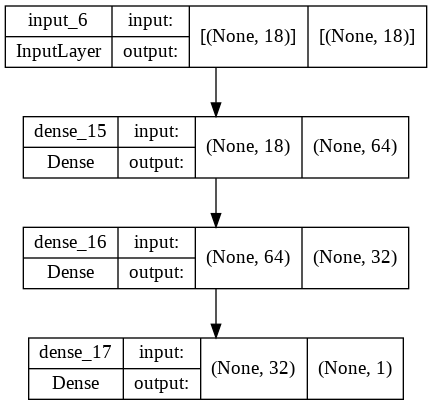

In [178]:
model = keras.Model(input, output)
plot_model(model, show_shapes=True)

In [179]:
model.compile(optimizer='adam',
    loss='MSE')

In [180]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)


In [181]:
model.fit(x=x_train, y=y_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

Epoch 1/500
2/2 [==============================] - 1s 136ms/step - loss: 422.9752 - val_loss: 367.6270
Epoch 2/500
2/2 [==============================] - 0s 29ms/step - loss: 413.2144 - val_loss: 357.5023
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 403.3311 - val_loss: 347.5247
Epoch 4/500
2/2 [==============================] - 0s 30ms/step - loss: 393.7344 - val_loss: 337.7818
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 383.4209 - val_loss: 328.1844
Epoch 6/500
2/2 [==============================] - 0s 27ms/step - loss: 374.3940 - val_loss: 318.6149
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 364.6719 - val_loss: 308.9970
Epoch 8/500
2/2 [==============================] - 0s 32ms/step - loss: 355.0683 - val_loss: 299.3692
Epoch 9/500
2/2 [==============================] - 0s 28ms/step - loss: 345.5464 - val_loss: 289.6898
Epoch 10/500
2/2 [==============================] - 0s 31ms/step - loss: 335.9008

In [182]:
model.predict_on_batch(x_test)

array([[20.52321 ],
       [17.805964],
       [17.914766],
       [13.514652],
       [17.504578],
       [22.661528]], dtype=float32)

In [183]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 24.6355


24.635528564453125

In [ ]:
#Eredmények:nagyon kevés adatra a legkisebb hiba abban az esetben lett, amikor csak 1 napra visszamenő adatokat adtam meg. Kipróbáltam olyat is ahol 3 napra visszamenőleg megvoltak az adatok, de annak sokkal nagyobb lett a tesztre a hibája (120 körül)
#Lehet ha bonyolultabb neurális hálót rakok össze akkor már úgy fel tudna fedezni a több napra visszamenőleges adatokból egy hosszabb trendet
